# Introducción

En la primer clase se repasamos algunos conceptos clásicos sobre el aprendizaje automático. Se repasaron ahí las aproximaciones de aprendizaje supervisado, no supervisado y por refuerzo.  

Los objetivos de este _notebook_ son:
1. Cimentar algunos conceptos básicos que seguiremos viendo a lo largo del curso cuando pasemos a modelos de aprendizaje profundo (_e.g._ procesamiento de datos, funciones de pérdida, _overfitting_).
2. Ver estos conceptos en acción en un caso de aprendizaje supervisado y uno no supervisado.
3. Familiarizarnos con rudimentos de PyTorch, una librería que utilizaremos de ahora en más.

Para ello vamos a analizar un _dataset_ muy popular, llamado comunmente "_penguins dataset_". Utilizaremos estos datos para predecir el valor de una variable en función de otra (i.e., una regresión lineal) y realizar una clasificación de cada individuo en base a sus características (_i.e._, _clustering_ de los datos).

___

**Nota**: Este _notebook_ está inspirado en trabajo realizado por el Dr. Ignacio Ramírez para el curso "_Aprendizaje automático básico para científicos (AABC)_", el cual compartió amablemente materiales. Dicho curso también se encuentra organizado por CICADA. 
___


# _"Penguins dataset"_, nuestro objeto de estudio

![](https://imgur.com/orZWHly.png)

El [Penguins Dataset](https://github.com/allisonhorst/palmerpenguins) se trata de un _dataset_ donde se listan 5 caracteristicas para tres especies distintas de pingüinos. Los datos son: el sexo del pingüino, largo y ancho del pico ("_bill_" en ingles), el largo de la aleta ("_flipper_") y el peso en gramos de cada individuo.

<div style="text-align: center;">
  <img src="https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/man/figures/culmen_depth.png" width="500" />
</div>

En el mismo hay tres especies distribuidas en distintas islas del Archipielago de Palmer.

Como primera tarea vamos a observar nuestros datos, en lo que típicamente se llama un "análisis exploratorio".

## Análisis exploratorio del _dataset_

El primer paso es, naturalmente, importar los datos. Afortunadamente, la librería _seaborn_ posee al _dataset_ entre los datos disponibles

In [1]:
# cargamos las librerias
import seaborn as sns,  pandas as pd

# importamos el dataset
penguins = sns.load_dataset('penguins')

# llevamos al dataset a un dataframe de pandas
data = pd.DataFrame(penguins)

In [2]:
# pispeamos los datos
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Vemos que cada fila corresponde a un individuo. En las columnas se encuentran las variables que ya habíamos mencionado

In [4]:
# con el metodo .info() podemos ver un poco más, incluyendo datos faltantes por variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
# con shape podemos ver las dimensiones del dataset 
print(data.shape) # cuantos individuos hay?

(344, 7)


In [122]:
# con el metodo .describe() podemos obtener algunos datos mas cuantitativos de cada variable
data.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


## Aprendizaje supervisado: prediciendo valores contínuos




**TODO**: avanzar con esto

Correlacion:


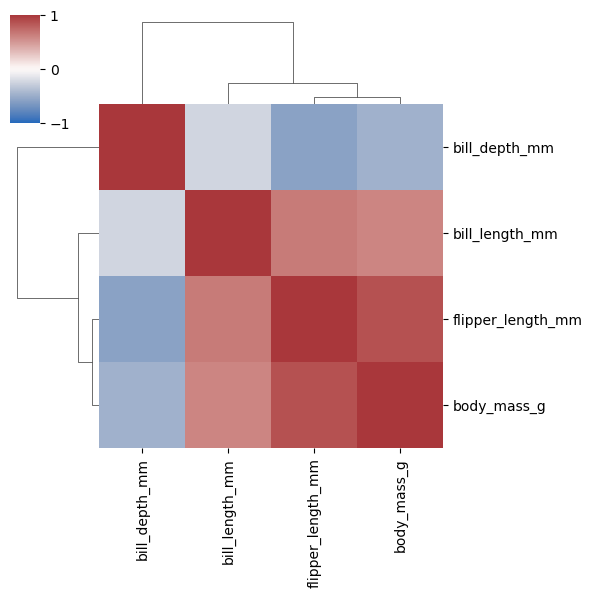

In [14]:
# calculamos la correlacion y agrupamos jerarquicamente usando el metodo .clustermap()
print('Correlacion:')
sns.clustermap(data.drop(['species', 'island','sex'], axis = 1).corr(),  
               figsize = (6,6), 
               cmap = 'vlag',
               vmax = 1, vmin = -1)

Podemos concluir entonces... **TODO**: completar...

___

**Pasemos ahora a intentar predecir, por ejemplo, el peso de un individuo a partir del largo de su aleta**, dado que estas dos variables parecen fuertemente correlacionadas. Para llevar a cabo esta tarea vamos a hacer una regresión lineal. 


Nos enfrentamos a un típico caso de ***aprendizaje supervisado***. Haremos una primer aproximación donde para una fracción de datos intentaremos hacer una predicción. Estimaremos el error en nuestro conjunto y en un conjunto de ***testeo***, que todavía no hayamos visto. Intentaremos luego modificar los pesos en nuestro modelo en una dirección donde el cambio sea favorable a realizar mejores predicciones; iteraremos el proceso durante varias ***épocas***.

**TO-DO**: incluir el concepto de validation set.


Antes que nada, veamos la relación entre las dos variables seleccionadas

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

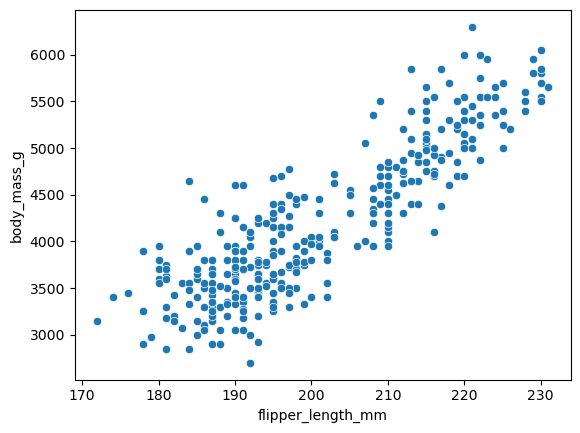

In [34]:
sns.scatterplot(data = data, x = 'flipper_length_mm', y = 'body_mass_g')

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

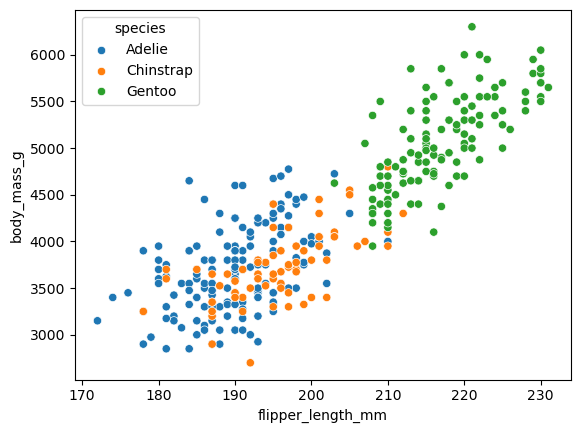

In [33]:
# vemos lo mismo segun especie?
sns.scatterplot(data = data, x = 'flipper_length_mm', y = 'body_mass_g', hue = 'species')

La relación entre ambas variables se ve bastante lineal. Podemos explorar aparte si otras variables... [**TODO**: completar]

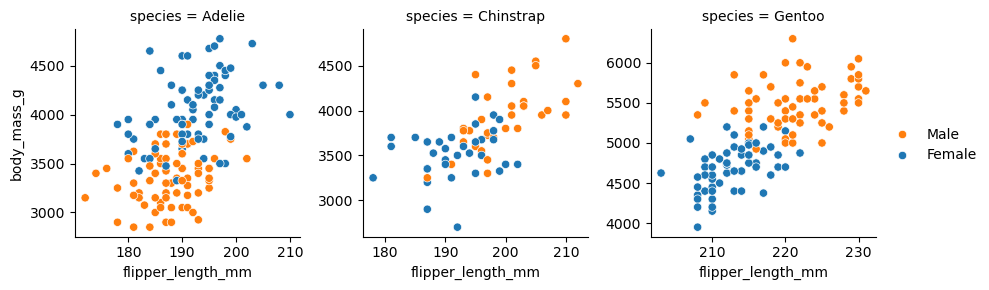

In [31]:
# y por sexo?
g = sns.FacetGrid(data, col="species", sharey = False, sharex = False)
g.map_dataframe(sns.scatterplot, x="flipper_length_mm", y="body_mass_g", hue="sex")
g.add_legend()

Ya nos divertimos un poco con los datos. Respecto a nuestra preocupación inicial (si la relación entre ambas variables podría ser estimada mediante una regresión lineal) parecería que podemos quedarnos tranquilos.

Pasemos entonces a realizar las estimaciones pertinentes por dos vías bastante distintas...

**Missing values**

tratar aca el tema de missing values...

### Primer abordaje: usando funciones como una _"caja negra"_

Las regresiones lineales son muy comunes, así que no es de extrañar que existan _pipelines_ encajonados para realizarlas sin entender del todo qué sucede. A esto le podríamos decir usar una función o grupo de funciones como si fueran una "caja negra"

In [37]:
import numpy as np

In [44]:
from sklearn.model_selection import train_test_split # separación de datos en entrenamiento y validación

In [45]:
# filtramos para asegurarnos de tener valores en ambas variables
data_r = data.query("not flipper_length_mm.isnull() and not body_mass_g.isnull()")

In [46]:
# llevamos a array de numpy
X = data_r[['flipper_length_mm']].to_numpy()
y = data_r[['body_mass_g']].to_numpy()

In [47]:
# Separamos el dataset en un conjunto de entrenamiento y otro de testeo
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [48]:
ytrain

array([[4300.],
       [4750.],
       [3300.],
       [4100.],
       [4750.],
       [4800.],
       [5550.],
       [3500.],
       [3700.],
       [3950.],
       [4000.],
       [3050.],
       [3525.],
       [4400.],
       [3350.],
       [3950.],
       [5650.],
       [4800.],
       [3450.],
       [3400.],
       [4150.],
       [6300.],
       [4100.],
       [3700.],
       [5150.],
       [4600.],
       [2900.],
       [5850.],
       [3900.],
       [4850.],
       [3450.],
       [5800.],
       [3600.],
       [3650.],
       [3650.],
       [4350.],
       [5350.],
       [3725.],
       [3325.],
       [4650.],
       [5650.],
       [3450.],
       [3600.],
       [5200.],
       [3525.],
       [5400.],
       [5350.],
       [3350.],
       [3250.],
       [3900.],
       [3850.],
       [3875.],
       [3750.],
       [4600.],
       [4750.],
       [4850.],
       [2925.],
       [3900.],
       [3600.],
       [4050.],
       [3300.],
       [5700.],
       [

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

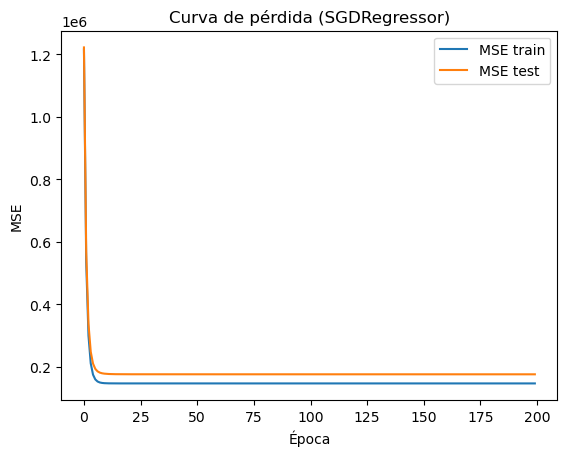

R2 final — train: 0.773 | test: 0.710


In [49]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1) Escalamos features (SGD es muy sensible a escala)
scaler = StandardScaler()
Xtr = scaler.fit_transform(Xtrain)
Xte = scaler.transform(Xtest)

# 2) Modelo lineal entrenado por SGD (mínimos cuadrados)
sgd = SGDRegressor(loss='squared_error', penalty=None, alpha=0.0,
                   learning_rate='invscaling', eta0=0.01, random_state=0)

n_epochs = 200
mse_tr, mse_te, r2_tr, r2_te = [], [], [], []

# Inicializo y luego itero manualmente con partial_fit
sgd.partial_fit(Xtr, ytrain)
for _ in range(n_epochs):
    sgd.partial_fit(Xtr, ytrain)  # una "época" sobre todo el training
    ytr = sgd.predict(Xtr)
    yte = sgd.predict(Xte)
    mse_tr.append(mean_squared_error(ytrain, ytr))
    mse_te.append(mean_squared_error(ytest, yte))
    r2_tr.append(r2_score(ytrain, ytr))
    r2_te.append(r2_score(ytest, yte))

# 3) Plot de la pérdida (MSE) por época
plt.figure()
plt.plot(mse_tr, label='MSE train')
plt.plot(mse_te, label='MSE test')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()
plt.title('Curva de pérdida (SGDRegressor)')
plt.show()

print(f"R2 final — train: {r2_tr[-1]:.3f} | test: {r2_te[-1]:.3f}")

Perfecto, hicimos una regresión lineal usando las funciones de sk-learn. **Pero no sabemos mucho qué pasó en el medio**

- **TODO**: escribir todo esto mejor, dar el pie a lo que viene

## Segundo abordaje: haciendo una regresión lineal con nuestras funciones

### Introducción a PyTorch

- disgresion hacia qué es pytorch, etc

**TODO**: dar credito a NeuroMatch

---
# Section 2: The Basics of PyTorch

*Time estimate: ~2 hours 05 mins*

___
**TODO**: ver que tiene sentido quedarse de todo esto, en base a lo que viene en la siguiente seccion (reproducir el SGDRegressor en PyTorch)
___

PyTorch is a Python-based scientific computing package targeted at two sets of
audiences:

-  A replacement for NumPy optimized for the power of GPUs
-  A deep learning platform that provides significant flexibility
   and speed

At its core, PyTorch provides a few key features:

- A multidimensional [Tensor](https://pytorch.org/docs/stable/tensors.html) object, similar to [NumPy Array](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) but with GPU acceleration.
- An optimized **autograd** engine for automatically computing derivatives.
- A clean, modular API for building and deploying **deep learning models**.

You can find more information about PyTorch in the Appendix.

#### Section 2.1: Creating Tensors


There are various ways of creating tensors, and when doing any real deep learning project, we will usually have to do so.

**Construct tensors directly:**

---



In [105]:
# importando librerias
import torch, random

In [99]:
# We can construct a tensor directly from some common python iterables,
# such as list and tuple nested iterables can also be handled as long as the
# dimensions are compatible

# tensor from a list
a = torch.tensor([0, 1, 2])

#tensor from a tuple of tuples
b = ((1.0, 1.1), (1.2, 1.3))
b = torch.tensor(b)

# tensor from a numpy array
c = np.ones([2, 3])
c = torch.tensor(c)

print(f"Tensor a: {a}")
print(f"Tensor b: {b}")
print(f"Tensor c: {c}")

Tensor a: tensor([0, 1, 2])
Tensor b: tensor([[1.0000, 1.1000],
        [1.2000, 1.3000]])
Tensor c: tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


**Some common tensor constructors:**

---

In [100]:
# The numerical arguments we pass to these constructors
# determine the shape of the output tensor

x = torch.ones(5, 3)
y = torch.zeros(2)
z = torch.empty(1, 1, 5)
print(f"Tensor x: {x}")
print(f"Tensor y: {y}")
print(f"Tensor z: {z}")

Tensor x: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Tensor y: tensor([0., 0.])
Tensor z: tensor([[[0., 0., 0., 0., 0.]]])


Notice that `.empty()` does not return zeros, but seemingly random numbers. Unlike `.zeros()`, which initialises the elements of the tensor with zeros, `.empty()` just allocates the memory. It is hence a bit faster if you are looking to just create a tensor.

**Creating random tensors and tensors like other tensors:**

---

In [101]:
# There are also constructors for random numbers

# Uniform distribution
a = torch.rand(1, 3)

# Normal distribution
b = torch.randn(3, 4)

# There are also constructors that allow us to construct
# a tensor according to the above constructors, but with
# dimensions equal to another tensor.

c = torch.zeros_like(a)
d = torch.rand_like(c)

print(f"Tensor a: {a}")
print(f"Tensor b: {b}")
print(f"Tensor c: {c}")
print(f"Tensor d: {d}")

Tensor a: tensor([[0.8684, 0.4500, 0.7342]])
Tensor b: tensor([[ 1.0481,  0.3393,  0.7325, -0.6945],
        [-1.0181,  0.6625, -0.9297, -1.6698],
        [ 0.0659,  0.4445,  0.4401, -0.9439]])
Tensor c: tensor([[0., 0., 0.]])
Tensor d: tensor([[0.7996, 0.0976, 0.4392]])


*Reproducibility*:

- PyTorch Random Number Generator (RNG): You can use `torch.manual_seed()` to seed the RNG for all devices (both CPU and GPU):

```python
import torch
torch.manual_seed(0)
```
- For custom operators, you might need to set python seed as well:

```python
import random
random.seed(0)
```

- Random number generators in other libraries (e.g., NumPy):

```python
import numpy as np
np.random.seed(0)
```

Here, we define for you a function called `set_seed` that does the job for you!

In [102]:
def set_seed(seed=None, seed_torch=True):
  """
  Function that controls randomness. NumPy and random modules must be imported.

  Args:
    seed : Integer
      A non-negative integer that defines the random state. Default is `None`.
    seed_torch : Boolean
      If `True` sets the random seed for pytorch tensors, so pytorch module
      must be imported. Default is `True`.

  Returns:
    Nothing.
  """
  if seed is None:
    seed = np.random.choice(2 ** 32)
  random.seed(seed)
  np.random.seed(seed)
  if seed_torch:
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

  print(f'Random seed {seed} has been set.')

Now, let's use the `set_seed` function in the previous example. Execute the cell multiple times to verify that the numbers printed are always the same.

In [103]:
def simplefun(seed=True, my_seed=None):
  """
  Helper function to verify effectiveness of set_seed attribute

  Args:
    seed: Boolean
      Specifies if seed value is provided or not
    my_seed: Integer
      Initializes seed to specified value

  Returns:
    Nothing
  """
  if seed:
    set_seed(seed=my_seed)

  # uniform distribution
  a = torch.rand(1, 3)
  # normal distribution
  b = torch.randn(3, 4)

  print("Tensor a: ", a)
  print("Tensor b: ", b)

In [106]:
simplefun(seed=True, my_seed=0)  # Turn `seed` to `False` or change `my_seed`

Random seed 0 has been set.
Tensor a:  tensor([[0.4963, 0.7682, 0.0885]])
Tensor b:  tensor([[ 0.3643,  0.1344,  0.1642,  0.3058],
        [ 0.2100,  0.9056,  0.6035,  0.8110],
        [-0.0451,  0.8797,  1.0482, -0.0445]])


**Numpy-like number ranges:**
---
The ```.arange()``` and ```.linspace()``` behave how you would expect them to if you are familar with numpy.

In [107]:
a = torch.arange(0, 10, step=1)
b = np.arange(0, 10, step=1)

c = torch.linspace(0, 5, steps=11)
d = np.linspace(0, 5, num=11)

print(f"Tensor a: {a}\n")
print(f"Numpy array b: {b}\n")
print(f"Tensor c: {c}\n")
print(f"Numpy array d: {d}\n")

Tensor a: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Numpy array b: [0 1 2 3 4 5 6 7 8 9]

Tensor c: tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000,
        4.5000, 5.0000])

Numpy array d: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]



### Coding Exercise 2.1: Creating Tensors

Below you will find some incomplete code. Fill in the missing code to construct the specified tensors.

We want the tensors:

$A:$ 20 by 21 tensor consisting of ones

$B:$ a tensor with elements equal to the elements of numpy array $Z$

$C:$ a tensor with the same number of elements as $A$ but with values $
\sim \mathcal{U}(0,1)^\dagger$

$D:$ a 1D tensor containing the even numbers between 4 and 40 inclusive.

<br>

$^\dagger$: $\mathcal{U(\alpha, \beta)}$ denotes the [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) from $\alpha$ to $\beta$, with $\alpha, \beta \in \mathbb{R}$.


In [108]:
def tensor_creation(Z):
  """
  A function that creates various tensors.

  Args:
    Z: numpy.ndarray
      An array of shape (3,4)

  Returns:
    A : Tensor
      20 by 21 tensor consisting of ones
    B : Tensor
      A tensor with elements equal to the elements of numpy array Z
    C : Tensor
      A tensor with the same number of elements as A but with values ∼U(0,1)
    D : Tensor
      A 1D tensor containing the even numbers between 4 and 40 inclusive.
  """
  #################################################
  ## TODO for students: fill in the missing code
  ## from the first expression
  raise NotImplementedError("Student exercise: say what they should have done")
  #################################################
  A = ...
  B = ...
  C = ...
  D = ...

  return A, B, C, D


# numpy array to copy later
Z = np.vander([1, 2, 3], 4)

# Uncomment below to check your function!
# A, B, C, D = tensor_creation(Z)
# checkExercise1(A, B, C, D)

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content-dl/tree/main/tutorials/W1D1_BasicsAndPytorch/solutions/W1D1_Tutorial1_Solution_7137e978.py)



```
All correct!
```

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Creating_Tensors_Exercise")

#### Section 2.2: Operations in PyTorch

**Tensor-Tensor operations**

We can perform operations on tensors using methods under `torch.`

In [ ]:
# @title Video 4: Tensor Operators
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'R1R8VoYXBVA'), ('Bilibili', 'BV1G44y127As')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Tensors_Operators_Video")

**Tensor-Tensor operations**

We can perform operations on tensors using methods under `torch.`.

In [ ]:
a = torch.ones(5, 3)
b = torch.rand(5, 3)
c = torch.empty(5, 3)
d = torch.empty(5, 3)

# this only works if c and d already exist
torch.add(a, b, out=c)

# Pointwise Multiplication of a and b
torch.multiply(a, b, out=d)

print(c)
print(d)

However, in PyTorch, most common Python operators are overridden.
The common standard arithmetic operators ($+$, $-$, $*$, $/$, and $**$) have all been lifted to elementwise operations

In [ ]:
x = torch.tensor([1, 2, 4, 8])
y = torch.tensor([1, 2, 3, 4])
x + y, x - y, x * y, x / y, x**y  # The `**` is the exponentiation operator

**Tensor Methods**

Tensors also have a number of common arithmetic operations built in. A full list of **all** methods can be found  in the appendix (there are a lot!)

All of these operations should have similar syntax to their numpy equivalents (feel free to skip if you already know this!).

In [ ]:
x = torch.rand(3, 3)
print(x)
print("\n")
# sum() - note the axis is the axis you move across when summing
print(f"Sum of every element of x: {x.sum()}")
print(f"Sum of the columns of x: {x.sum(axis=0)}")
print(f"Sum of the rows of x: {x.sum(axis=1)}")
print("\n")

print(f"Mean value of all elements of x {x.mean()}")
print(f"Mean values of the columns of x {x.mean(axis=0)}")
print(f"Mean values of the rows of x {x.mean(axis=1)}")

**Matrix Operations**

The `@` symbol is overridden to represent matrix multiplication. You can also use `torch.matmul()` to multiply tensors. For dot multiplication, you can use `torch.dot()`, or manipulate the axes of your tensors and do matrix multiplication (we will cover that in the next section).

Transposes of 2D tensors are obtained using `torch.t()` or `Tensor.T`. Note the lack of brackets for `Tensor.T` - it is an attribute, not a method.



### Coding Exercise 2.2 : Simple tensor operations

Below are two expressions involving operations on matrices.

\begin{equation}
\textbf{A} =
\begin{bmatrix}2 &4 \\5 & 7
\end{bmatrix}
\begin{bmatrix} 1 &1 \\2 & 3
\end{bmatrix}
+
\begin{bmatrix}10 & 10  \\ 12 & 1
\end{bmatrix}
\end{equation}


and


\begin{equation}
b =
\begin{bmatrix} 3 \\ 5 \\ 7
\end{bmatrix} \cdot
\begin{bmatrix} 2 \\ 4 \\ 8
\end{bmatrix}
\end{equation}

The code block below that computes these expressions using PyTorch is incomplete - fill in the missing lines.

In [ ]:
def simple_operations(a1: torch.Tensor, a2: torch.Tensor, a3: torch.Tensor):
  """
  Helper function to demonstrate simple operations
  i.e., Multiplication of tensor a1 with tensor a2 and then add it with tensor a3

  Args:
    a1: Torch tensor
      Tensor of size ([2,2])
    a2: Torch tensor
      Tensor of size ([2,2])
    a3: Torch tensor
      Tensor of size ([2,2])

  Returns:
    answer: Torch tensor
      Tensor of size ([2,2]) resulting from a1 multiplied with a2, added with a3
  """
  ################################################
  ## TODO for students:  complete the first computation using the argument matricies
  raise NotImplementedError("Student exercise: fill in the missing code to complete the operation")
  ################################################
  #
  answer = ...
  return answer


# Computing expression 1:

# init our tensors
a1 = torch.tensor([[2, 4], [5, 7]])
a2 = torch.tensor([[1, 1], [2, 3]])
a3 = torch.tensor([[10, 10], [12, 1]])
## uncomment to test your function
# A = simple_operations(a1, a2, a3)
# print(A)

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content-dl/tree/main/tutorials/W1D1_BasicsAndPytorch/solutions/W1D1_Tutorial1_Solution_10c96625.py)



```
tensor([[20, 24],
        [31, 27]])
```

In [ ]:
def dot_product(b1: torch.Tensor, b2: torch.Tensor):
  ###############################################
  ## TODO for students:  complete the first computation using the argument matricies
  raise NotImplementedError("Student exercise: fill in the missing code to complete the operation")
  ###############################################
  """
  Helper function to demonstrate dot product operation
  Dot product is an algebraic operation that takes two equal-length sequences
  (usually coordinate vectors), and returns a single number.
  Geometrically, it is the product of the Euclidean magnitudes of the
  two vectors and the cosine of the angle between them.

  Args:
    b1: Torch tensor
      Tensor of size ([3])
    b2: Torch tensor
      Tensor of size ([3])

  Returns:
    product: Tensor
      Tensor of size ([1]) resulting from b1 scalar multiplied with b2
  """
  # Use torch.dot() to compute the dot product of two tensors
  product = ...
  return product


# Computing expression 2:
b1 = torch.tensor([3, 5, 7])
b2 = torch.tensor([2, 4, 8])
## Uncomment to test your function
# b = dot_product(b1, b2)
# print(b)

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content-dl/tree/main/tutorials/W1D1_BasicsAndPytorch/solutions/W1D1_Tutorial1_Solution_84663577.py)



```
tensor(82)
```

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Simple_Tensor_Operations_Exercise")

#### Section 2.3 Manipulating Tensors in Pytorch

In [ ]:
# @title Video 5: Tensor Indexing
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', '0d0KSJ3lJbg'), ('Bilibili', 'BV1BM4y1K7pD')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Manipulating_Tensors_Video")

**Indexing**

Just as in numpy, elements in a tensor can be accessed by index. As in any numpy array, the first element has index 0 and ranges are specified to include the first to last_element-1. We can access elements according to their relative position to the end of the list by using negative indices. Indexing is also referred to as slicing.

For example, `[-1]` selects the last element; `[1:3]` selects the second and the third elements, and `[:-2]` will select all elements excluding the last and second-to-last elements.

In [ ]:
x = torch.arange(0, 10)
print(x)
print(x[-1])
print(x[1:3])
print(x[:-2])

When we have multidimensional tensors, indexing rules work the same way as NumPy.

In [ ]:
# make a 5D tensor
x = torch.rand(1, 2, 3, 4, 5)

print(f" shape of x[0]:{x[0].shape}")
print(f" shape of x[0][0]:{x[0][0].shape}")
print(f" shape of x[0][0][0]:{x[0][0][0].shape}")

**Flatten and reshape**

There are various methods for reshaping tensors. It is common to have to express 2D data in 1D format. Similarly, it is also common to have to reshape a 1D tensor into a 2D tensor. We can achieve this with the `.flatten()` and `.reshape()` methods.

In [ ]:
z = torch.arange(12).reshape(6, 2)
print(f"Original z: \n {z}")

# 2D -> 1D
z = z.flatten()
print(f"Flattened z: \n {z}")

# and back to 2D
z = z.reshape(3, 4)
print(f"Reshaped (3x4) z: \n {z}")

You will also see the `.view()` methods used a lot to reshape tensors. There is a subtle difference between `.view()` and `.reshape()`, though for now we will just use `.reshape()`. The documentation can be found in the Appendix.

**Squeezing tensors**

When processing batches of data, you will quite often be left with singleton dimensions. E.g., `[1,10]` or `[256, 1, 3]`. This dimension can quite easily mess up your matrix operations if you don't plan on it being there...

In order to compress tensors along their singleton dimensions we can use the `.squeeze()` method. We can use the `.unsqueeze()` method to do the opposite.

In [ ]:
x = torch.randn(1, 10)
# printing the zeroth element of the tensor will not give us the first number!

print(x.shape)
print(f"x[0]: {x[0]}")

Because of that pesky singleton dimension, `x[0]` gave us the first row instead!

In [ ]:
# Let's get rid of that singleton dimension and see what happens now
x = x.squeeze(0)
print(x.shape)
print(f"x[0]: {x[0]}")

In [ ]:
# Adding singleton dimensions works a similar way, and is often used when tensors
# being added need same number of dimensions

y = torch.randn(5, 5)
print(f"Shape of y: {y.shape}")

# lets insert a singleton dimension
y = y.unsqueeze(1)
print(f"Shape of y: {y.shape}")

**Permutation**

Sometimes our dimensions will be in the wrong order! For example, we may be dealing with RGB images with dim $[3\times48\times64]$, but our pipeline expects the colour dimension to be the last dimension, i.e., $[48\times64\times3]$. To get around this we can use the `.permute()` method.

In [ ]:
# `x` has dimensions [color,image_height,image_width]
x = torch.rand(3, 48, 64)

# We want to permute our tensor to be [ image_height , image_width , color ]
x = x.permute(1, 2, 0)
# permute(1,2,0) means:
# The 0th dim of my new tensor = the 1st dim of my old tensor
# The 1st dim of my new tensor = the 2nd
# The 2nd dim of my new tensor = the 0th
print(x.shape)

You may also see `.transpose()` used. This works in a similar way as permute, but can only swap two dimensions at once.

**Concatenation**

In this example, we concatenate two matrices along rows (axis 0, the first element of the shape) vs. columns (axis 1, the second element of the shape). We can see that the first output tensor’s axis-0 length (`6`) is the sum of the two input tensors’ axis-0 lengths (`3+3`); while the second output tensor’s axis-1 length (`8`) is the sum of the two input tensors’ axis-1 lengths (`4+4`).

In [ ]:
# Create two tensors of the same shape
x = torch.arange(12, dtype=torch.float32).reshape((3, 4))
y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

# Concatenate along rows
cat_rows = torch.cat((x, y), dim=0)

# Concatenate along columns
cat_cols = torch.cat((x, y), dim=1)

# Printing outputs
print('Concatenated by rows: shape{} \n {}'.format(list(cat_rows.shape), cat_rows))
print('\n Concatenated by colums: shape{}  \n {}'.format(list(cat_cols.shape), cat_cols))

**Conversion to Other Python Objects**

Converting a tensor to a numpy.ndarray, or vice versa, is easy, and the converted result does not share memory. This minor inconvenience is quite important: when you perform operations on the CPU or GPUs, you do not want to halt computation, waiting to see whether the NumPy package of Python might want to be doing something else with the same chunk of memory.

When converting to a NumPy array, the information being tracked by the tensor will be lost, i.e., the computational graph. This will be covered in detail when you are introduced to autograd tomorrow!

In [ ]:
x = torch.randn(5)
print(f"x: {x}  |  x type:  {x.type()}")

y = x.numpy()
print(f"y: {y}  |  y type:  {type(y)}")

z = torch.tensor(y)
print(f"z: {z}  |  z type:  {z.type()}")

To convert a size-1 tensor to a Python scalar, we can invoke the item function or Python’s built-in functions.

In [ ]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

#### Coding Exercise 2.3: Manipulating Tensors
Using a combination of the methods discussed above, complete the functions below.

**Function A**

This function takes in two 2D tensors $A$ and $B$ and returns the column sum of A multiplied by the sum of all the elmements of $B$, i.e., a scalar, e.g.,

\begin{equation}
  \text{If }
  A = \begin{bmatrix}
  1 & 1 \\
  1 & 1
  \end{bmatrix}
  \text{and }
  B = \begin{bmatrix}
  1 & 2 & 3 \\
  1 & 2 & 3
  \end{bmatrix}
  \text{ then }
  Out =  \begin{bmatrix}
  2 & 2
  \end{bmatrix} \cdot 12 = \begin{bmatrix}
  24 & 24
  \end{bmatrix}
\end{equation}

**Function B**

This function takes in a square matrix $C$ and returns a 2D tensor consisting of a flattened $C$ with the index of each element appended to this tensor in the row dimension, e.g.,

\begin{equation}
  \text{If }
  C = \begin{bmatrix}
  2 & 3 \\
  -1 & 10
  \end{bmatrix}
  \text{ then }
  Out = \begin{bmatrix}
  0 & 2 \\
  1 & 3 \\
  2 & -1 \\
  3 & 10
  \end{bmatrix}
\end{equation}

**Hint:** Pay close attention to singleton dimensions.

**Function C**

This function takes in two 2D tensors $D$ and $E$. If the dimensions allow it, this function returns the elementwise sum of $D$-shaped $E$, and $D$; else this function returns a 1D tensor that is the concatenation of the two tensors, e.g.,

\begin{equation}
  \text{If }
  D = \begin{bmatrix}
  1 & -1 \\
  -1 & 3
  \end{bmatrix}
  \text{and }
  E = \begin{bmatrix}
  2 & 3 & 0 & 2 \\
  \end{bmatrix}
  \text{ then }
  Out = \begin{bmatrix}
  3 & 2 \\
  -1 & 5
  \end{bmatrix}
\end{equation}

<br>

\begin{equation}
  \text{If }
  D = \begin{bmatrix}
  1 & -1 \\
  -1 & 3
  \end{bmatrix}
  \text{and }
  E = \begin{bmatrix}
  2 & 3 & 0  \\
  \end{bmatrix}
  \text{ then }
  Out = \begin{bmatrix}
  1 & -1 & -1 & 3  & 2 & 3 & 0
  \end{bmatrix}
\end{equation}

<br>

**Hint:** `torch.numel()` is an easy way of finding the number of elements in a tensor.

In [ ]:
def functionA(my_tensor1, my_tensor2):
  """
  This function takes in two 2D tensors `my_tensor1` and `my_tensor2`
  and returns the column sum of
  `my_tensor1` multiplied by the sum of all the elmements of `my_tensor2`,
  i.e., a scalar.

  Args:
    my_tensor1: torch.Tensor
    my_tensor2: torch.Tensor

  Retuns:
    output: torch.Tensor
      The multiplication of the column sum of `my_tensor1` by the sum of
      `my_tensor2`.
  """
  ################################################
  ## TODO for students: complete functionA
  raise NotImplementedError("Student exercise: complete function A")
  ################################################
  # TODO multiplication the sum of the tensors
  output = ...

  return output


def functionB(my_tensor):
  """
  This function takes in a square matrix `my_tensor` and returns a 2D tensor
  consisting of a flattened `my_tensor` with the index of each element
  appended to this tensor in the row dimension.

  Args:
    my_tensor: torch.Tensor

  Returns:
    output: torch.Tensor
      Concatenated tensor.
  """
  ################################################
  ## TODO for students: complete functionB
  raise NotImplementedError("Student exercise: complete function B")
  ################################################
  # TODO flatten the tensor `my_tensor`
  my_tensor = ...
  # TODO create the idx tensor to be concatenated to `my_tensor`
  idx_tensor = ...
  # TODO concatenate the two tensors
  output = ...

  return output


def functionC(my_tensor1, my_tensor2):
  """
  This function takes in two 2D tensors `my_tensor1` and `my_tensor2`.
  If the dimensions allow it, it returns the
  elementwise sum of `my_tensor1`-shaped `my_tensor2`, and `my_tensor2`;
  else this function returns a 1D tensor that is the concatenation of the
  two tensors.

  Args:
    my_tensor1: torch.Tensor
    my_tensor2: torch.Tensor

  Returns:
    output: torch.Tensor
      Concatenated tensor.
  """
  ################################################
  ## TODO for students: complete functionB
  raise NotImplementedError("Student exercise: complete function C")
  ################################################
  # TODO check we can reshape `my_tensor2` into the shape of `my_tensor1`
  if ...:
    # TODO reshape `my_tensor2` into the shape of `my_tensor1`
    my_tensor2 = ...
    # TODO sum the two tensors
    output = ...
  else:
    # TODO flatten both tensors
    my_tensor1 = ...
    my_tensor2 = ...
    # TODO concatenate the two tensors in the correct dimension
    output = ...

  return output


## Implement the functions above and then uncomment the following lines to test your code
# print(functionA(torch.tensor([[1, 1], [1, 1]]), torch.tensor([[1, 2, 3], [1, 2, 3]])))
# print(functionB(torch.tensor([[2, 3], [-1, 10]])))
# print(functionC(torch.tensor([[1, -1], [-1, 3]]), torch.tensor([[2, 3, 0, 2]])))
# print(functionC(torch.tensor([[1, -1], [-1, 3]]), torch.tensor([[2, 3, 0]])))

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content-dl/tree/main/tutorials/W1D1_BasicsAndPytorch/solutions/W1D1_Tutorial1_Solution_234c6f74.py)



```
tensor([24, 24])
tensor([[ 0,  2],
        [ 1,  3],
        [ 2, -1],
        [ 3, 10]])
tensor([[ 3,  2],
        [-1,  5]])
tensor([ 1, -1, -1,  3,  2,  3,  0])
```

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Manipulating_Tensors_Exercise")

#### Section 2.4: GPUs

In [ ]:
# @title Video 6: GPU vs CPU
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', '9Mc9GFUtILY'), ('Bilibili', 'BV1nM4y1K7qx')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_GPU_vs_CPU_Video")


By default, when we create a tensor it will *not* live on the GPU!

In [ ]:
x = torch.randn(10)
print(x.device)

When using Colab notebooks, by default, will not have access to a GPU. In order to start using GPUs we need to request one. We can do this by going to the runtime tab at the top of the page.

By following *Runtime* → *Change runtime type* and selecting **GPU** from the *Hardware Accelerator* dropdown list, we can start playing with sending tensors to GPUs.

Once you have done this your runtime will restart and you will need to rerun the first setup cell to reimport PyTorch. Then proceed to the next cell.

For more information on the GPU usage policy you can view in the Appendix.

**Now we have a GPU.**


The cell below should return `True`.

In [ ]:
print(torch.cuda.is_available())

[CUDA](https://developer.nvidia.com/cuda-toolkit) is an API developed by Nvidia for interfacing with GPUs. PyTorch provides us with a layer of abstraction, and allows us to launch CUDA kernels using pure Python.

In short, we get the power of parallelizing our tensor computations on GPUs, whilst only writing (relatively) simple Python!

Here, we define the function `set_device`, which returns the device use in the notebook, i.e., `cpu` or `cuda`. Unless otherwise specified, we use this function on top of every tutorial, and we store the device variable such as

```python
DEVICE = set_device()
```

Let's define the function using the PyTorch package `torch.cuda`, which is lazily initialized, so we can always import it, and use `is_available()` to determine if our system supports CUDA.

In [ ]:
def set_device():
  """
  Set the device. CUDA if available, CPU otherwise

  Args:
    None

  Returns:
    Nothing
  """
  device = "cuda" if torch.cuda.is_available() else "cpu"
  if device != "cuda":
    print("GPU is not enabled in this notebook. \n"
          "If you want to enable it, in the menu under `Runtime` -> \n"
          "`Hardware accelerator.` and select `GPU` from the dropdown menu")
  else:
    print("GPU is enabled in this notebook. \n"
          "If you want to disable it, in the menu under `Runtime` -> \n"
          "`Hardware accelerator.` and select `None` from the dropdown menu")

  return device

Let's make some CUDA tensors!

In [ ]:
# common device agnostic way of writing code that can run on cpu OR gpu
# that we provide for you in each of the tutorials
DEVICE = set_device()

# we can specify a device when we first create our tensor
x = torch.randn(2, 2, device=DEVICE)
print(x.dtype)
print(x.device)

# we can also use the .to() method to change the device a tensor lives on
y = torch.randn(2, 2)
print(f"y before calling to() | device: {y.device} | dtype: {y.type()}")

y = y.to(DEVICE)
print(f"y after calling to() | device: {y.device} | dtype: {y.type()}")

**Operations between cpu tensors and cuda tensors**

Note that the type of the tensor changed after calling `.to()`. What happens if we try and perform operations on tensors on devices?

In [ ]:
x = torch.tensor([0, 1, 2], device=DEVICE)
y = torch.tensor([3, 4, 5], device="cpu")

## Uncomment the following line and run this cell
# z = x + y

We cannot combine CUDA tensors and CPU tensors in this fashion. If we want to compute an operation that combines tensors on different devices, we need to move them first! We can use the `.to()` method as before, or the `.cpu()` and `.cuda()` methods. Note that using the `.cuda()` will throw an error, if CUDA is not enabled in your machine.

Generally, in this course, all Deep Learning is done on the GPU, and any computation is done on the CPU, so sometimes we have to pass things back and forth, so you'll see us call.

In [ ]:
x = torch.tensor([0, 1, 2], device=DEVICE)
y = torch.tensor([3, 4, 5], device="cpu")
z = torch.tensor([6, 7, 8], device=DEVICE)

# moving to cpu
x = x.to("cpu")  # alternatively, you can use x = x.cpu()
print(x + y)

# moving to gpu
y = y.to(DEVICE)  # alternatively, you can use y = y.cuda()
print(y + z)

### Coding Exercise 2.4: Just how much faster are GPUs?

Below is a simple function `simpleFun`. Complete this function, such that it performs the operations:

- Elementwise multiplication

- Matrix multiplication

The operations should be able to perfomed on either the CPU or GPU specified by the parameter `device`. We will use the helper function `timeFun(f, dim, iterations, device)`.

In [ ]:
dim = 10000
iterations = 1

In [ ]:
def simpleFun(dim, device):
  """
  Helper function to check device-compatiblity with computations

  Args:
    dim: Integer
    device: String
      "cpu" or "cuda"

  Returns:
    Nothing.
  """
  ###############################################
  ## TODO for students: recreate the function, but
  ## ensure all computations happens on the `device`
  raise NotImplementedError("Student exercise: fill in the missing code to create the tensors")
  ###############################################
  # 2D tensor filled with uniform random numbers in [0,1), dim x dim
  x = ...
  # 2D tensor filled with uniform random numbers in [0,1), dim x dim
  y = ...
  # 2D tensor filled with the scalar value 2, dim x dim
  z = ...

  # elementwise multiplication of x and y
  a = ...
  # matrix multiplication of x and z
  b = ...

  del x
  del y
  del z
  del a
  del b


## Implement the function above and uncomment the following lines to test your code
# timeFun(f=simpleFun, dim=dim, iterations=iterations)
# timeFun(f=simpleFun, dim=dim, iterations=iterations, device=DEVICE)

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content-dl/tree/main/tutorials/W1D1_BasicsAndPytorch/solutions/W1D1_Tutorial1_Solution_bb83a0e6.py)



Sample output (depends on your hardware)

```
time taken for 1 iterations of simpleFun(10000, cpu): 23.74070
time taken for 1 iterations of simpleFun(10000, cuda): 0.87535
```

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_How_Much_Faster_Are_GPUs_Exercise")

**Discuss!**

Try and reduce the dimensions of the tensors and increase the iterations. You can get to a point where the cpu only function is faster than the GPU function. Why might this be?

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content-dl/tree/main/tutorials/W1D1_BasicsAndPytorch/solutions/W1D1_Tutorial1_Solution_4ee0dee3.py)



In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_GPUs_Discussion")

#### Section 2.5: Datasets and Dataloaders

In [ ]:
# @title Video 7: Getting Data
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'LSkjPM1gFu0'), ('Bilibili', 'BV1744y127SQ')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Getting_Data_Video")

When training neural network models you will be working with large amounts of data. Fortunately, PyTorch offers some great tools that help you organize and manipulate your data samples.

In [ ]:
# Import dataset and dataloaders related packages
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, Grayscale

**Datasets**

The `torchvision` package gives you easy access to many of the publicly available datasets. Let's load the [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset, which contains color images of 10 different classes, like vehicles and animals.

Creating an object of type `datasets.CIFAR10` will automatically download and load all images from the dataset. The resulting data structure can be treated as a list containing data samples and their corresponding labels.

In [ ]:
# Download and load the images from the CIFAR10 dataset
cifar10_data = datasets.CIFAR10(
    root="data",  # path where the images will be stored
    download=True,  # all images should be downloaded
    transform=ToTensor()  # transform the images to tensors
    )

# Print the number of samples in the loaded dataset
print(f"Number of samples: {len(cifar10_data)}")
print(f"Class names: {cifar10_data.classes}")

We have 50,000 samples loaded. Now, let's take a look at one of them in detail. Each sample consists of an image and its corresponding label.

In [ ]:
# Choose a random sample
random.seed(2021)
image, label = cifar10_data[random.randint(0, len(cifar10_data))]
print(f"Label: {cifar10_data.classes[label]}")
print(f"Image size: {image.shape}")

Color images are modeled as 3 dimensional tensors. The first dimension corresponds to the channels ($\text{C}$) of the image (in this case we have RGB images). The second dimensions is the height ($\text{H}$) of the image and the third is the width ($\text{W}$). We can denote this image format as $\text{C} \times \text{H} \times \text{W}$.

### Coding Exercise 2.5: Display an image from the dataset

Let's try to display the image using `matplotlib`. The code below will not work, because `imshow` expects to have the image in a different format, i.e., $\text{C} \times \text{H} \times \text{W}$.

You need to reorder the dimensions of the tensor using the `permute` method of the tensor. PyTorch `torch.permute(*dims)` rearranges the original tensor according to the desired ordering and returns a new multidimensional rotated tensor. The size of the returned tensor remains the same as that of the original.

**Code hint:**

```python
# create a tensor of size 2 x 4
input_var = torch.randn(2, 4)
# print its size and the tensor
print(input_var.size())
print(input_var)

# dimensions permuted
input_var = input_var.permute(1, 0)
# print its size and the permuted tensor
print(input_var.size())
print(input_var)
```

In [ ]:
# TODO: Uncomment the following line to see the error that arises from the current image format
# plt.imshow(image)

# TODO: Comment the above line and fix this code by reordering the tensor dimensions
# plt.imshow(image.permute(...))
# plt.show()

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content-dl/tree/main/tutorials/W1D1_BasicsAndPytorch/solutions/W1D1_Tutorial1_Solution_b04bd357.py)

*Example output:*

<img alt='Solution hint' align='left' width=580.0 height=575.0 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content-dl/main/tutorials/W1D1_BasicsAndPytorch/static/W1D1_Tutorial1_Solution_b04bd357_0.png>



In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Display_an_Image_Exercise")

In [ ]:
#@title Video 8: Train and Test
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'JokSIuPs-ys'), ('Bilibili', 'BV1rV411H7s5')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Train_and_Test_Video")

**Training and Test Datasets**

When loading a dataset, you can specify if you want to load the training or the test samples using the `train` argument. We can load the training and test datasets separately. For simplicity, today we will not use both datasets separately, but this topic will be adressed in the next days.

In [ ]:
# Load the training samples
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
    )

# Load the test samples
test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
    )

In [ ]:
# @title Video 9: Data Augmentation - Transformations
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'sjegA9OBUPw'), ('Bilibili', 'BV19B4y1N77t')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

**Dataloader**

Another important concept is the `Dataloader`. It is a wrapper around the `Dataset` that splits it into minibatches (important for training the neural network) and makes the data iterable. The `shuffle` argument is used to shuffle the order of the samples across the minibatches.

In [ ]:
# Create dataloaders with
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

*Reproducibility:* DataLoader will reseed workers following Randomness in multi-process data loading algorithm. Use `worker_init_fn()` and a `generator` to preserve reproducibility:


```python
def seed_worker(worker_id):
  worker_seed = torch.initial_seed() % 2**32
  numpy.random.seed(worker_seed)
  random.seed(worker_seed)


g_seed = torch.Generator()
g_seed.manual_seed(my_seed)

DataLoader(
    train_dataset,
    batch_size=batch_size,
    num_workers=num_workers,
    worker_init_fn=seed_worker,
    generator=g_seed
    )
```

**Important:** For the `seed_worker` to have an effect, `num_workers` should be 2 or more.

We can now query the next batch from the data loader and inspect it. For this we need to convert the dataloader object to a Python iterator using the function `iter` and then we can query the next batch using the function `next`.

We can now see that we have a 4D tensor. This is because we have a 64 images in the batch ($B$) and each image has 3 dimensions: channels ($C$), height ($H$) and width ($W$). So, the size of the 4D tensor is $B \times C \times H \times W$.

In [ ]:
# Load the next batch
batch_images, batch_labels = next(iter(train_dataloader))
print('Batch size:', batch_images.shape)

# Display the first image from the batch
plt.imshow(batch_images[0].permute(1, 2, 0))
plt.show()

**Transformations**

Another useful feature when loading a dataset is applying transformations on the data - color conversions, normalization, cropping, rotation etc. There are many predefined transformations in the `torchvision.transforms` package and you can also combine them using the `Compose` transform. Checkout the [pytorch documentation](https://pytorch.org/vision/stable/transforms.html) for details.

### Coding Exercise 2.6: Load the CIFAR10 dataset as grayscale images

The goal of this excercise is to load the images from the CIFAR10 dataset as grayscale images. Note that we rerun the `set_seed` function to ensure reproducibility.

In [ ]:
def my_data_load():
  """
  Function to load CIFAR10 data as grayscale images

  Args:
    None

  Returns:
    data: DataFrame
      CIFAR10 loaded Dataframe of shape (3309, 14)
  """
  ###############################################
  ## TODO for students: load the CIFAR10 data,
  ## but as grayscale images and not as RGB colored.
  raise NotImplementedError("Student exercise: fill in the missing code to load the data")
  ###############################################
  ## TODO Load the CIFAR10 data using a transform that converts the images to grayscale tensors
  data = datasets.CIFAR10(...,
                          transform=...)
  # Display a random grayscale image
  image, label = data[random.randint(0, len(data))]
  plt.imshow(image.squeeze(), cmap="gray")
  plt.show()

  return data


set_seed(seed=2021)
## After implementing the above code, uncomment the following lines to test your code
# data = my_data_load()

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content-dl/tree/main/tutorials/W1D1_BasicsAndPytorch/solutions/W1D1_Tutorial1_Solution_1c5a709e.py)

*Example output:*

<img alt='Solution hint' align='left' width=580.0 height=575.0 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content-dl/main/tutorials/W1D1_BasicsAndPytorch/static/W1D1_Tutorial1_Solution_1c5a709e_1.png>



In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Load_CIFAR10_Exercise")

### Volviendo a clasificar por aprendizaje supervisado

In [110]:
import torch.nn as nn

In [117]:
# cargamos el Penguin Dataset con un DataLoader

# lo hacemos nosotros

### Task 5: Creating ``DataLoaders``—and why

Once we have created a ``Dataset`` object, we wrap it in a ``DataLoader``. This comes with a number of useful features:
#### Mini-batches
The ``DataLoader`` object allows us to put our inputs and targets in **mini-batches**, which makes for more efficient training.
- Note: rather than supplying one input-target pair to the model at a time, we supply "mini-batches" of these data at once (typically a small power of 2, like 16 or 32).
- The number of items we supply at once is called the `batch size`.
> **Q:** What number should we choose for the batch size?

#### Shuffling
The ``DataLoader`` can also randomly **shuffle** the data each epoch (when training).
- This avoids unwanted patterns in the data harming the fitting process. Consider providing lots of the positive class followed by the negative class, the network will only learn by saying yes all the time. Therefore need to intersperse positives and negatives.

#### Parallel loading
The ``DataLoader`` also allows **parallel loading** of mini-batches.
- This setup is especially useful for large datasets or image files that can't all be loaded into memory at once. The DataLoader loads data in small batches as needed, and using multiple workers allows this to happen in parallel with model training—improving overall speed.

<details>
<summary><strong>Why do we need a DataLoader?</strong></summary>
<p>
The <code>DataLoader</code> is a PyTorch utility that provides an iterable over the dataset, allowing us to easily access mini-batches of data. It handles batching, shuffling, and parallel loading of the data, which is essential for efficient training of neural networks.
</p>
</details>

<details>
<summary><strong>Note on batch normalisation</strong></summary>
<p>
We are going to use batch normalisation layers in our network, which won't work if the batch size is one. This can happen on the last batch, if we don't choose a batch size that evenly divides the number of items in the dataset. To avoid this, we can set the <code>drop_last</code> argument to <code>True</code>. The last batch, which will be of size <code>len(data_set) % batch_size</code>, gets dropped, and the data are reshuffled. This is only relevant during the training process — validation will use population statistics.
</p>
</details>

In [ ]:
from torch.utils.data import DataLoader

# Create training and validation DataLoaders.

### Task 6 -- Part (a): Creating a neural network in PyTorch
Here we will create our neural network in PyTorch, and have a general discussion on clean and messy ways of going about it.

The module `torch.nn` contains different classes that help you build neural network models. All models in PyTorch inherit from the subclass `nn.Module`, which has useful methods like `parameters()`, `__call__()`, and others.

`torch.nn` also has various layers that you can use to build your neural network. For example, we will use `nn.Linear` in our code below, which constructs a fully connected layer. `torch.nn.Linear` is a subclass of `torch.nn.Module`.

What exactly is a "layer"? It is essentially a step in the neural network computation. For example, the `nn.Linear` layer computes the linear transformation of the input vector $x$:

$$
y = W^T x + b
$$

where $W$ is the matrix of tunable parameters and $b$ is a bias vector.

We can also think of the ReLU activation as a "layer". However, there are no tunable parameters associated with the ReLU activation function.

The `__init__()` method is where we typically define the attributes of a class. In our case, all the "sub-components" of our model should be defined here.

The `forward` method is called when we use the neural network to make a prediction. Another term for "making a prediction" is **running the forward pass**, because information flows forward from the input through the hidden layers to the output. This builds a computational graph.

The `forward` method is called from the `__call__()` function of `nn.Module`, so that when we run `model(batch)`, the `forward` method is called.

### Summary of what we will do:
- First, we will create quite an **ugly network** to highlight how to make a neural network in PyTorch at a very basic level.
- We will then utilise `torch.nn.Sequential` as a **neater approach**.
- Finally, we will discuss how the **best approach** would be to write a class where various parameters (e.g. number of layers, dropout probabilities, etc.) are passed as arguments.


In [ ]:
from torch.nn import Module
from torch.nn import BatchNorm1d, Linear, ReLU, Dropout
from torch import Tensor


class FCNet(Module):
    """Fully-connected neural network."""

    # define __init__ function - model defined here.
    def __init__(self):
        pass

    # define forward function which calls network
    def forward(self, batch: Tensor) -> Tensor:
        pass


# define a model and print and test (try with torch.rand() function)

### Task 7: Selecting a loss function

- Cross-entropy is about the most common loss function for classification.
  - Details on this loss function are available in the [PyTorch docs](https://docs.pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).
- Let's instantiate it together.

In [ ]:
from torch.nn import CrossEntropyLoss

In [ ]:
## aca nosotros podriamos jugar con cosas que no sean MSE, que es el loss que usa el SGDRegressor de sklearn

### Task 8: Selecting an optimiser

While we talked about stochastic gradient descent in the slides, most people use the so-called [Adam optimiser](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html).

You can think of it as a more complex and improved implementation of SGD.

Here we will tell the optimiser what parameters to fit in order to minimise the loss.

In [ ]:
# Create an optimiser and give it the model's parameters.
from torch.optim import Adam

### Task 9: Writing basic training and validation loops

####  Applying an activation function to model outputs

Our model produces raw scores, called **logits**. These are unnormalized and can be positive or negative. On their own, logits are not directly interpretable.

To make sense of these outputs (e.g., “how confident is the model?”), we apply an **activation function** like `softmax`, which converts logits into **pseudo-probabilities**.

> **Important:** We do **not** apply this activation inside the model or during
> training. The loss function we’re using (`CrossEntropyLoss`) expects **raw logits** and handles this internally.  
> We only apply `softmax` **after training**, for tasks like evaluation or
> visualization.

In general, we don’t usually include the output activation function in the network itself because it’s often handled more efficiently and flexibly by the loss function. Keeping it separate makes it easier to swap in different losses or interpret raw logits directly during training and debugging.

<details>
<summary>Why softmax? And what’s this about thermodynamics?</summary>

- According to the
  [PyTorch documentation on `CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html),
  this loss combines `LogSoftmax` and `NLLLoss` into a single function — so we
  don’t need to apply softmax ourselves during training.
- [Documentation on `nn.Softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)
  shows that it's appropriate when the prediction should be **exactly one of**
  the possible classes — like species `Adelie`, `Chinstrap`, or `Gentoo`.

### What does softmax do?

Softmax turns logits into probabilities — it's what lets us say "the model is 90% confident it's a penguin of species `Adelie`."

### Physics connection

If you’ve studied physics, it might remind you of the **partition function** in thermodynamics — softmax turns logits into a normalised probability distribution, just as a partition function normalises energy states.  This analogy appears in several places in machine learning under names like "temperature scaling" and "energy-based models".

### When not to use softmax?
This activation is **not appropriate** if you want to assign **multiple labels** to the same input (e.g. both "dog" _and_ "cat").

### Final note on softmax and argmax
Since softmax is **monotonic** (it preserves order), using `argmax` on logits gives the same result as `argmax` on softmax probabilities.  
That’s why we don’t need to apply softmax just to get the predicted class.
</details>

---

### Part (a) -- training and validation loops

Have a go at writing the training and evaluation loops. Use the tips below to guide you.

#### Tips

- Configure the model separately for **training** and **validation**.
- Don't worry about storing metrics just yet, focus on the training and validation loops.
- Try to get it training first before implementing the validation loop. We will guide you through this process.

<details>
<summary>How does the loss **know** about parameters in the model? </summary>

- PyTorch tensors can track operations when `requires_grad=True`.
- When we run the **forward pass** (`preds = model(batch)`), PyTorch builds a **dynamic computation graph** that records all operations, including how the model's parameters were used to compute the predictions.
- The **loss** (`loss = criterion(preds, targets)`) depends on the predictions, so it's also connected to the model parameters via this graph.
- Calling `loss.backward()` performs the **backward pass**, where PyTorch:
  - Traverses the computation graph,
  - Computes gradients of the loss w.r.t. each parameter that requires gradients.

> `loss.backward()` **computes gradients but does not update** parameters. You need to call `optimizer.step()` to apply the updates.

Because PyTorch uses a **dynamic graph**, the graph is recreated on every forward pass, making it flexible and easy to debug.


</details>

<details>
<summary>PyTorch Autograd and <code>requires_grad</code></summary>

**NOTE:** In PyTorch, `requires_grad=True` is set automatically for the parameters of layers defined using `torch.nn.Module` subclasses.

Here’s a simple example:

```python
x = ones(10, requires_grad=True)
y = 2 * x.exp()
print(y)
```
</details>

<details>
<summary>Don't forget: Optimizer accumulates gradients</summary>

By default, PyTorch accumulates gradients each time you call `loss.backward()`.  
You must reset them manually with `optimizer.zero_grad()` before each training step.

</details>

<details>
<summary>Evaluation tip: Disable gradients</summary>

Use the decorator  `@no_grad()` or context `with no_grad():` during evaluation or inference.  
This saves memory and speeds things up by skipping gradient tracking.

</details>

---

### Part (b) -- tracking metrics

To track training and validation progress, follow these steps:

- Define a dictionary:
  ```python
  metrics = {"loss": [], "accuracy": []}
  ```

- Append the loss using `loss.item()` (it's a scalar; no gradients needed).

- Write a function `get_batch_accuracy(preds: Tensor, targets: Tensor)`.

- We need to supply the metrics as `means` over each epoch.
 <details>
 <summary> More on metrics structure</summary>

 The metrics should be a dictionary containing `"loss"` and `"accuracy"` as keys and lists as values which we append to during each iteration.  

 We can then use dictionary comprehension to get epoch-level statistics:
 ```python
 epoch_stats = {k: mean(v) for k, v in metrics.items()}
 ```
</details>

<details>
<summary>Example: Summarising metrics over an epoch</summary>

```python
# i.e. for a batch_size of 3
metrics = {"loss": [1.0, 2.0, 3.0], "accuracy": [0.7, 0.8, 0.9]}
epoch_stats = {k: mean(v) for k, v in metrics.items()}
```
</details> <details> <summary>Over-fitting warning</summary>

If the validation performance gets significantly worse while training performance improves, it’s a sign of over-fitting.

</details>


In [ ]:
from typing import Dict


def train_one_epoch(
    model: Module,
    train_loader: DataLoader,
    optimiser: Adam,
    loss_func: CrossEntropyLoss,
) -> Dict[str, float]:
    """Train ``model`` for once epoch.

    Parameters
    ----------
    model : Module
        The neural network.
    train_loader : DataLoader
        Training dataloader.
    optimiser : Adam
        The optimiser.
    loss_func : CrossEntropyLoss
        Cross-entropy loss function.

    Returns
    -------
    Dict[str, float]
        A dictionary of metrics.

    """

    # setup the model for training. IMPORTANT!

    # setup loss and accuracy metrics dictionary

    # iterate over the batch, targets in the train_loader
    for batch, targets in train_loader:
        pass

        # zero the gradients (otherwise gradients accumulate)

        # run forward model to make predictions

        # compute loss
        # e.g. pred : Tensor([3]) and target : int

        # compute gradients

        # nudge parameters in direction of steepest descent

        # append metrics


def validate_one_epoch(
    model: Module,
    valid_loader: DataLoader,
    loss_func: CrossEntropyLoss,
) -> Dict[str, float]:
    """Validate ``model`` for a single epoch.

    Parameters
    ----------
    model : Module
        The neural network.
    valid_loader : DataLoader
        Validation dataloader.
    loss_func : CrossEntropyLoss
        Cross-entropy loss function.

    Returns
    -------
    Dict[str, float]
        Metrics of interest.

    """

    for batch, targets in valid_loader:
        pass

### Task 10: Training, extracting and plotting metrics

- Now we can train our model for a specified number of epochs.
  - During each epoch the model "sees" each training item once.
- Append the training and validation metrics to a list.
- Turn them into a ``pandas.DataFrame``
  - Note: You can turn a ``List[Dict[str, float]]``, say ``my_list`` into a ``DataFrame`` with ``DataFrame(my_list)``.
- Use Matplotlib to plot the training and validation metrics as a function of the number of epochs.

We will begin the code block together before you complete it independently.  
After some time we will go through the solution together.

In [ ]:
epochs = 3

# define train_metrics and valid_metrics lists.

for _ in range(epochs):

    # append output of train_one_epoch() to train_metrics

    # append output of valid_one_epoch() to valid_metrics

    pass

### Task 11: Visualise some results

Let's do this part together—though feel free to make a start on your own if you have completed the previous exercises.

<details>
<summary>Visualising results</summary>

```python

import matplotlib.pyplot as plt

quantities = ["loss", "accuracy"]
splits = ["train", "valid"]

epochs_range = np.arange(1, epochs + 1)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for i, quant in enumerate(quantities):
    ax = axes[i]
    for split in splits:
        values = metrics[f"{quant}_{split}"]
        ax.plot(epochs_range, values, marker='o', markersize=2, label=split.capitalize())
    ax.set_title(quant.capitalize())
    ax.set_xlabel("Epoch")
    ax.set_ylabel(quant.capitalize())
    ax.set_xlim(1, epochs)
    ax.set_ylim(0.0, 1.0)
    ax.legend()

fig.tight_layout()
plt.show()


```


In [ ]:
import matplotlib.pyplot as plt

quantities = ["loss", "accuracy"]
splits = ["train", "valid"]


In [ ]:
# la que sigue abajo es de otro notebook que es de NeuroMatch, capaz borrar, 

In [111]:
class WideNet(nn.Module):
  """
   A Wide neural network with a single hidden layer
   Structure is as follows:
   nn.Sequential(
        nn.Linear(1, n_cells) + nn.Tanh(), # Fully connected layer with tanh activation
        nn.Linear(n_cells, 1) # Final fully connected layer
    )
  """

  def __init__(self):
    """
    Initializing the parameters of WideNet

    Args:
      None

    Returns:
      Nothing
    """
    n_cells = 512
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(1, n_cells),
        nn.Tanh(),
        nn.Linear(n_cells, 1),
    )

  def forward(self, x):
    """
    Forward pass of WideNet

    Args:
      x: torch.Tensor
        2D tensor of features

    Returns:
      Torch tensor of model predictions
    """
    return self.layers(x)

In [113]:
# Creating an instance
set_seed(seed=42)
wide_net = WideNet()
print(wide_net)

Random seed 42 has been set.
WideNet(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=512, bias=True)
    (1): Tanh()
    (2): Linear(in_features=512, out_features=1, bias=True)
  )
)


In [114]:
# Create a mse loss function
loss_function = nn.MSELoss()

# Stochstic Gradient Descent optimizer (you will learn about momentum soon)
lr = 0.003  # Learning rate
sgd_optimizer = torch.optim.SGD(wide_net.parameters(), lr=lr, momentum=0.9)

___
**TODO**: ajustar acá para mechar el caso del penguin dataset, etc
___

In [115]:
# Reset all gradients to zero
sgd_optimizer.zero_grad()

# Forward pass (Compute the output of the model on the features (inputs))
prediction = wide_net(inputs)

# Compute the loss
loss = loss_function(prediction, targets)
print(f'Loss: {loss.item()}')

# Perform backpropagation to build the graph and compute the gradients
loss.backward()

# Optimizer takes a tiny step in the steepest direction (negative of gradient)
# and "updates" the weights and biases of the network
sgd_optimizer.step()

NameError: name 'inputs' is not defined

In [140]:
# Boxplot
# The box plot of the dataset,will show us the visual representation of how our data is scattered over the the plane

<Axes: >

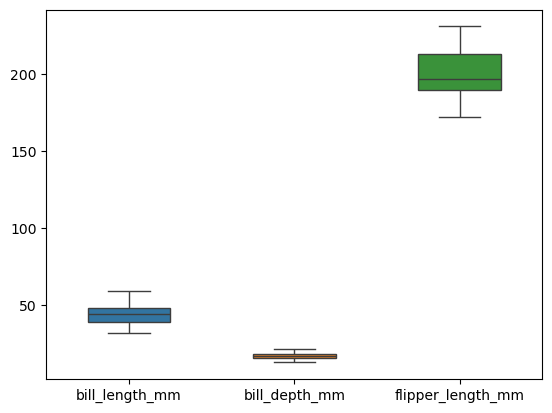

In [143]:
df1 = data[['bill_length_mm', 'bill_depth_mm','flipper_length_mm']]
sns.boxplot(data=df1, width=0.5,fliersize=5)

In [144]:
# Scatterplot
# The scatter plot which shows us the correlation with respect to other features. This method helps just to figure out the important features which account the most for the classification in our model.

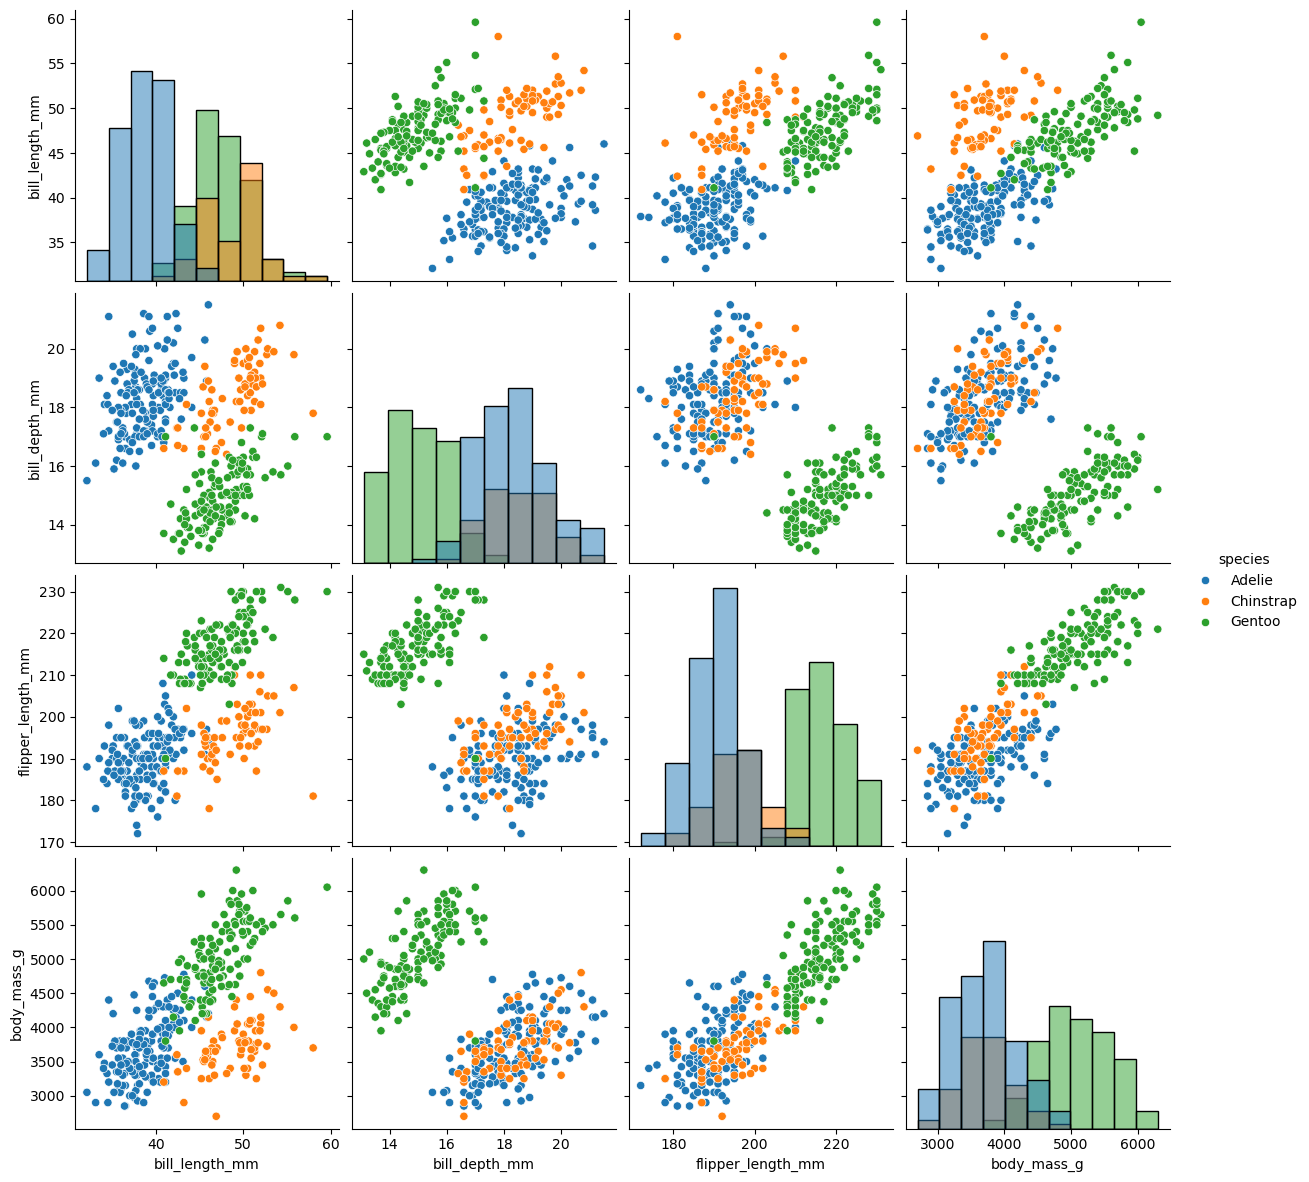

In [145]:
sns.pairplot(data, hue="species", height=3,diag_kind="hist")

In [146]:
import matplotlib.pyplot as plt

In [147]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,Male
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

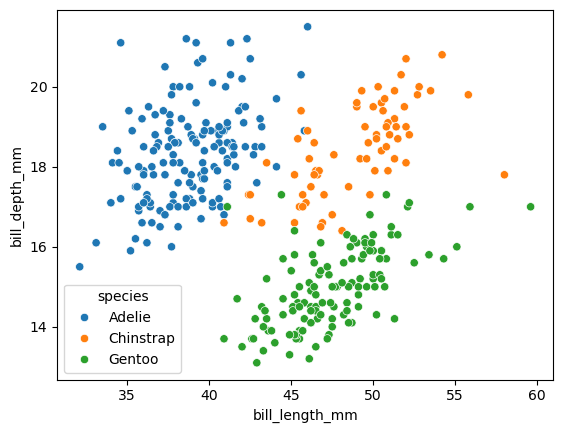

In [148]:
sns.scatterplot(data = data, hue = 'species', x = 'bill_length_mm', y = 'bill_depth_mm')

In [25]:
# decir algo respecto de esto...

# Aprendizaje no supervisado

KNN

**TODO:** conseguir el panel aquel que lo explicaba lindo de R + robar lo que se habia hecho para AABC

**incluir un poco de data para que sigan viendo todo esto**

![](https://www.tidymodels.org/learn/statistics/k-means/kmeans.gif)

In [156]:
from sklearn.neighbors import KNeighborsClassifier # traemos el clasificador de KNN del paquete

In [157]:
# Separamos el dataset en un conjunto de entrenamiento y otro de testeo
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [160]:
# Ajustamos un modelo KNN a los datos de las columnas seleccionadas
knn = KNeighborsClassifier(n_neighbors=1) # creamos el clasificador
knn.fit(Xtrain, ytrain) # lo ajustamos a los datos

# Evaluamos el rendimiento del modelo en el set de testeo
yPredichos = knn.predict(Xtest) # obtenemos las predicciones del modelo
es_correcto = (yPredichos == ytest) # comparamos con las etiquetas reales, para ver si son correctas
score = 100*np.mean(es_correcto) # porcentaje: 100 x fracción de inferencias correctas
score = np.round(score) # redondeamos

# Imprimimos el resultado
print(f'\n Utilizando las columnas bill_length_mm y bill_depth_mm, hay un {score}% de respuestas correctas.\n')


 Utilizando las columnas bill_length_mm y bill_depth_mm, hay un 93.0% de respuestas correctas.



Pasamos a visualizar cómo clasificó el kNN...

elbow method, etc

In [161]:
yPredichos

array([1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 2, 0,
       2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 2, 1,
       1, 1, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1])

[1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 2,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 1]

<Axes: xlabel='x', ylabel='y'>

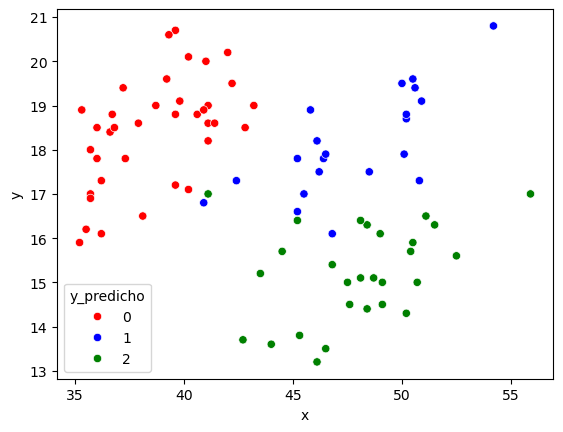

In [171]:
palette = {
    0: 'red',
    1: 'blue',
    2: 'green'
}

sns.scatterplot(data = pd.concat([pd.DataFrame.from_dict({'x': [x[0]], 'y': [x[1]], 'y_predicho': [y]}) for x,y in zip(Xtest, [z for z in yPredichos])]), x = 'x', y = 'y',
               hue = 'y_predicho', palette = palette)

# Aprendizaje por refuerzo